In [10]:
import os
import pandas as pd
import seaborn as sns

def get_text(folder = './BERT/result/'):
    files = []
    for root,dirs,fs in os.walk(folder):
        files = [folder+f for f in fs]

    df_res = None
    for f in files:
        df = pd.read_csv(f, usecols=["user", "text"])
        df_res = pd.concat([df_res,df], axis=0, sort=False)

    return df_res

df_res = get_text('../data_cleaned/tweets/hash/')

# Words number per sentence

In [51]:
def trunc(x):
    a = len(x['text'].split(' '))
    return a if a < 60 else 60

df_res['len'] = df_res.apply(trunc, axis=1)

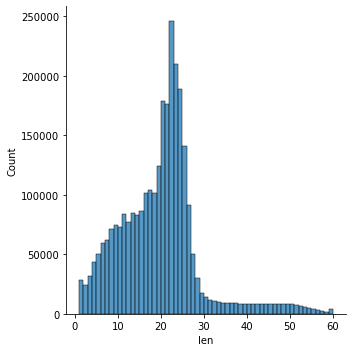

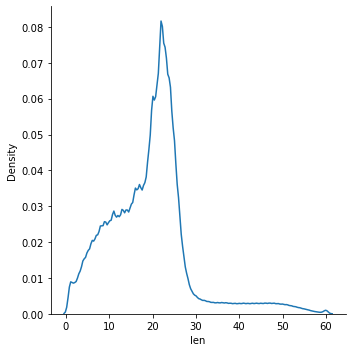

In [52]:
sns.displot(data=df_res, x="len", binwidth=1)
sns.displot(data=df_res, x="len",kind='kde')

# Tweets number per user

In [53]:
data = df_res['user'].value_counts()
from collections import Counter
v = [i if i<8 else 8 for i in data.values]
print(Counter(v))
dict = {'Tweets Numbers':v}
df = pd.DataFrame(dict)

Counter({1: 754470, 2: 173444, 3: 72550, 8: 65435, 4: 39257, 5: 24789, 6: 17145, 7: 12322})


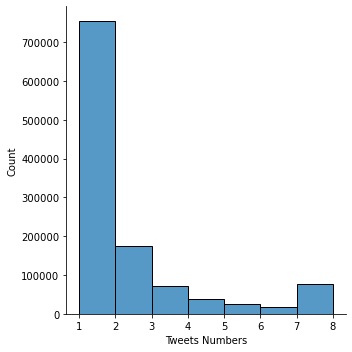

In [54]:
sns.displot(data=df, x='Tweets Numbers',binwidth=1)